##  Import des modules et dépendances

In [1]:
from rnn_model import SimpleRNN
from data_processing import *
from data_processing import load_file

### Test rapide du chargement et du tokenizer

On vérifie que :
1. Le fichier est bien chargé.
2. Les phrases sont correctement tokenisées.
3. Les émotions associées sont cohérentes.


In [2]:
text, emotion = load_file("./dataset/train.txt")

print(text[2])
print(tokenizer(text[2]))
print(emotion[2])

im grabbing a minute to post i feel greedy wrong
['im', 'grabbing', 'a', 'minute', 'to', 'post', 'i', 'feel', 'greedy', 'wrong']
anger


###  Vérification du générateur de tokens

On teste la fonction `yield_tokens()` pour s’assurer qu’elle parcourt bien tout le corpus  
et renvoie une liste plate de tous les mots (tokens).  
On limite l’affichage pour ne pas surcharger la sortie.


In [3]:
# Test du générateur de tokens
lst = list(yield_tokens(text))
print(lst[:50])  # affiche seulement les 50 premiers tokens
print("Total tokens:", len(lst))


['i', 'didnt', 'feel', 'humiliated', 'i', 'can', 'go', 'from', 'feeling', 'so', 'hopeless', 'to', 'so', 'damned', 'hopeful', 'just', 'from', 'being', 'around', 'someone', 'who', 'cares', 'and', 'is', 'awake', 'im', 'grabbing', 'a', 'minute', 'to', 'post', 'i', 'feel', 'greedy', 'wrong', 'i', 'am', 'ever', 'feeling', 'nostalgic', 'about', 'the', 'fireplace', 'i', 'will', 'know', 'that', 'it', 'is', 'still']
Total tokens: 306661


### Construction du vocabulaire

On crée un vocabulaire avec `build_vocab_from_iterator()` :  
- chaque mot unique reçoit un identifiant entier,  
- les tokens spéciaux `<pad>` et `<unk>` sont ajoutés,  
- et on vérifie que certains mots courants ont bien une valeur associée.


In [4]:
## Associer à chaque mot une valeur unique (entier positif) **pas de doublon**
vocab = build_vocab_from_iterator(lst, specials=["<pad>", "<unk>"])
print(len(vocab))
print(vocab["i"])
print(vocab["didnt"])
print(vocab["feel"])

15214
2
3
4


###  Vocabulaire des émotions

On construit maintenant le vocabulaire des **classes d’émotions**,  
de la même manière que pour les mots du texte.
Chaque émotion correspond à un identifiant unique.


In [5]:
# Faire pareil avec les émotions, qui représentent les classes
classes = build_vocab_from_iterator(yield_tokens(emotion))
print(len(classes))
print(classes["anger"])


6
1


###  Test — Encodage d’une phrase en entiers


In [6]:
# Coder une phrase ## Représenter une phrase comme une suite de valeurs
print(text[1])
codage_entier_phrase = vocab(tokenizer(text[1]))
print(codage_entier_phrase)

i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake
[2, 6, 7, 8, 9, 10, 11, 12, 10, 13, 14, 15, 8, 16, 17, 18, 19, 20, 21, 22, 23]


###  Représenter chaque phrase comme un tenseur d'entiers  
À partir de cette étape, on commence à utiliser **PyTorch** pour manipuler les données.
###  Représenter chaque phrase sous forme one-hot  
Chaque mot est transformé en un vecteur binaire où une seule position vaut `1`.  
 Charger tout le dataset en one-hot peut être coûteux en mémoire — on préfère souvent le faire **par batch** avec un `DataLoader`.



In [7]:
## Représenter chaque phrase comme un tensor d'entiers **seulement à partir de cette étape, on utiliser la librairie pytorch**
from torch import tensor   # Import minimal autorisé

tensor_entier = tensor(codage_entier_phrase)
print(tensor_entier)

tensor([ 2,  6,  7,  8,  9, 10, 11, 12, 10, 13, 14, 15,  8, 16, 17, 18, 19, 20,
        21, 22, 23])


In [8]:
## Représenter chaque phrase comme un tensor one hot **attention, il peut être difficile de charger en mémoire l'ensemble du dataset sous la forme on-hot, privilégier si besoin la génération one-hot par batch, en utilisant un Dataloader**
tensor_one_hot = one_hot(tensor_entier, num_classes=len(vocab))
print(tensor_one_hot[:10])

[[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

RNN
Réseau

## Entrée (input) : mot par mot, la première dimension correspond à la taille du batch - Dimension : (batch_size, vocab_size) ## Sortie (output) : valeurs de classes prédites, la première dimension correspond à la taille du batch - Dimension : (batch_size, class_size)

### Étape 1 : Tester le réseau avec un mot unique (batch_size = 1, sans récurrence)


In [9]:
import torch
from rnn_model import SimpleRNN
from data_processing import build_vocab_from_iterator, tokenizer, one_hot
from torch.utils.data import DataLoader
from dataset_nlp import EmotionDataset  # ton fichier avec la classe ci-dessus


In [10]:
# Exemple de vocabulaire
vocab = build_vocab_from_iterator(["hello", "world", "<pad>", "<unk>"])
vocab_size = len(vocab)

# Initialiser le modèle
emb_size = 128
hidden_size = 256
class_size = 5  # Exemple : 5 classes d'émotions
rnn = SimpleRNN(vocab_size, emb_size, hidden_size, class_size)

# Tester avec un mot unique
word = "hello"
word_idx = vocab([word])[0]
one_hot_word = one_hot([word_idx], num_classes=vocab_size)[0]  # [vocab_size]
one_hot_tensor = torch.tensor(one_hot_word, dtype=torch.float32).unsqueeze(0)  # [1, vocab_size]

# Initialiser l'état caché
hidden = rnn.init_hidden(batch_size=1)

# Passer le mot dans le réseau
output, hidden = rnn(one_hot_tensor, hidden)
print("Output:", output)
print("Hidden state:", hidden)

Output: tensor([[-1.3571, -1.6602, -1.8526, -1.5256, -1.7250]],
       grad_fn=<LogSoftmaxBackward0>)
Hidden state: tensor([[-1.0035e-01, -1.3253e-01,  2.0601e-02,  1.7054e-01, -1.4101e-01,
         -2.3113e-01, -2.2976e-01, -3.1047e-02, -1.5642e-01,  2.3424e-01,
         -1.1943e-01, -2.7248e-01,  1.4614e-01,  1.0315e-01, -1.2543e-01,
         -4.3361e-02,  8.6662e-03,  5.0226e-02, -1.7501e-01, -9.7438e-02,
          7.0754e-02, -1.1957e-01, -1.2396e-01,  9.8346e-02,  7.3166e-02,
         -6.5795e-02, -2.6078e-02, -1.5470e-02, -3.1892e-02, -2.6138e-01,
         -1.1896e-01,  1.1426e-01,  7.6048e-02,  8.2866e-02,  1.1485e-01,
         -2.7786e-01,  1.5225e-01,  2.1574e-02, -1.1005e-01,  3.0211e-02,
         -1.2746e-01,  6.2493e-03,  4.2803e-02, -9.3021e-02,  1.8730e-01,
          1.2200e-01, -8.2056e-02,  2.4534e-02,  1.9807e-02,  1.7239e-01,
         -6.2639e-02,  8.0631e-02,  1.8794e-01, -2.5721e-02, -4.8843e-02,
          6.7863e-02,  5.6038e-02, -2.1934e-01, -1.8591e-01, -1.0159e-

### Étape 2 : Tester avec la récurrence (ajout de chaque mot)


In [14]:


# --- 1. Créer un vocabulaire simple ---
vocab = build_vocab_from_iterator(["hello", "world", "<pad>", "<unk>"])
vocab_size = len(vocab)

# --- 2. Initialiser le modèle ---
emb_size = 128
hidden_size = 256
class_size = 5  # par exemple : 5 émotions
rnn = SimpleRNN(vocab_size, emb_size, hidden_size, class_size)

# --- 3. Exemple de phrase ---
sentence = ["hello", "roua"]
indices = vocab(sentence)  # -> [index_hello, index_world]

# --- 4. Encoder chaque mot en one-hot (en utilisant ta fonction) ---
one_hot_vectors = one_hot(indices, num_classes=vocab_size)

# --- 5. Initialiser l’état caché ---
hidden = rnn.init_hidden(batch_size=1)

# --- 6. Passer les mots un par un (récurrence) ---
for i, vec in enumerate(one_hot_vectors):
    word_tensor = torch.tensor(vec, dtype=torch.float32).unsqueeze(0)  # [1, vocab_size]
    output, hidden = rnn(word_tensor, hidden)
    print(f"Step {i+1} | Word ID: {indices[i]} | Output: {output}")

print("\nFinal hidden state:", hidden)


Step 1 | Word ID: 0 | Output: tensor([[-1.6172, -1.4896, -1.6752, -1.7067, -1.5734]],
       grad_fn=<LogSoftmaxBackward0>)
Step 2 | Word ID: 3 | Output: tensor([[-1.6828, -1.4824, -1.6425, -1.5780, -1.6758]],
       grad_fn=<LogSoftmaxBackward0>)

Final hidden state: tensor([[ 8.2195e-02, -2.3711e-01, -1.4122e-01,  1.1348e-01, -5.0683e-02,
         -1.9446e-01,  1.3475e-01, -1.2273e-01,  4.5906e-02, -5.5017e-02,
         -4.6746e-02, -1.9322e-01,  1.0754e-01, -8.7856e-02, -1.8809e-01,
         -4.2591e-02, -4.5787e-02, -6.4169e-02, -1.8305e-01,  6.9305e-03,
          1.9881e-01, -1.3570e-01, -1.4608e-01, -3.6005e-02, -1.4725e-01,
         -2.8959e-02,  2.5060e-01, -4.6009e-02,  6.0508e-02, -3.7236e-02,
          1.4066e-02, -1.9708e-01,  1.3228e-01, -3.2625e-03,  3.9620e-02,
         -1.5147e-01,  1.5441e-01, -5.6318e-02, -4.8049e-02, -6.4424e-02,
         -1.3384e-01, -1.4552e-01,  1.8096e-01,  1.6854e-01,  5.8884e-02,
          1.1151e-01, -4.9366e-02,  1.0255e-01,  6.7700e-02,  3.1

### Étape 3 : Tester avec un batch plus grand (utiliser un DataLoader)


In [12]:

# --- 1. Charger les données ---
text, emotion = load_file("./dataset/train.txt")

# --- 2. Construire les vocabulaires ---
vocab = build_vocab_from_iterator(yield_tokens(text), specials=["<pad>", "<unk>"])
classes = build_vocab_from_iterator(yield_tokens(emotion))

# --- 3. Créer le dataset et le DataLoader ---
dataset = EmotionDataset(text, emotion, vocab, classes, max_len=20)
loader = DataLoader(dataset, batch_size=8, shuffle=True)  # batch de 8 phrases

# --- 4. Initialiser le réseau ---
vocab_size = len(vocab)
emb_size = 64
hidden_size = 128
class_size = len(classes)

rnn = SimpleRNN(vocab_size, emb_size, hidden_size, class_size)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
rnn = rnn.to(device)

# --- 5. Récupérer un batch pour test ---
for X, y in loader:
    X, y = X.to(device), y.to(device)
    batch_size, seq_len, _ = X.shape

    # Initialiser l’état caché pour ce batch
    hidden = rnn.init_hidden(batch_size=batch_size, device=device)

    print(f"Batch shape: {X.shape} (batch_size={batch_size}, seq_len={seq_len}, vocab_size={vocab_size})")

    # Passer la séquence mot par mot
    for t in range(seq_len):
        output, hidden = rnn(X[:, t, :], hidden)

    print("Output shape:", output.shape)  # [batch_size, class_size]
    print("Hidden shape:", hidden.shape)  # [batch_size, hidden_size]
    break  # un seul batch suffit pour le test


Batch shape: torch.Size([8, 20, 15214]) (batch_size=8, seq_len=20, vocab_size=15214)
Output shape: torch.Size([8, 6])
Hidden shape: torch.Size([8, 128])


In [13]:
from train_rnn import RNNTrainer  
trainer = RNNTrainer(
    train_path="./dataset/train.txt",
    test_path="./dataset/test.txt",
    epochs=20,
    batch_size=16,
    hidden_size=128,
    emb_size=64
)

trainer.train()
trainer.evaluate()


 Data prepared: 16000 samples, vocab=15214, classes=6
✅ Model initialized on cpu
Epoch 01 | Loss: 1.5799 | Accuracy: 33.09%
Epoch 02 | Loss: 1.5298 | Accuracy: 36.24%
Epoch 03 | Loss: 1.2457 | Accuracy: 47.14%
Epoch 04 | Loss: 1.0606 | Accuracy: 55.30%
Epoch 05 | Loss: 0.8809 | Accuracy: 66.69%
Epoch 06 | Loss: 0.8072 | Accuracy: 71.12%
Epoch 07 | Loss: 0.7745 | Accuracy: 73.47%
Epoch 08 | Loss: 0.7094 | Accuracy: 76.62%
Epoch 09 | Loss: 0.6356 | Accuracy: 79.39%
Epoch 10 | Loss: 0.5632 | Accuracy: 81.84%
Epoch 11 | Loss: 0.5056 | Accuracy: 83.88%
Epoch 12 | Loss: 0.4794 | Accuracy: 84.74%
Epoch 13 | Loss: 0.4310 | Accuracy: 86.21%
Epoch 14 | Loss: 0.4098 | Accuracy: 87.00%
Epoch 15 | Loss: 0.3836 | Accuracy: 87.85%
Epoch 16 | Loss: 0.3636 | Accuracy: 88.31%
Epoch 17 | Loss: 0.4054 | Accuracy: 87.14%
Epoch 18 | Loss: 0.3513 | Accuracy: 88.69%
Epoch 19 | Loss: 0.3159 | Accuracy: 89.74%
Epoch 20 | Loss: 0.3180 | Accuracy: 90.18%
🏁 Training complete.
 Test accuracy: 67.60%


67.6

### OptimizedRNNTrainer
Cette classe reprend la logique du `RNNTrainer` mais ajoute :
- Un filtrage **TF-IDF adouci** pour ignorer les mots trop rares ou trop fréquents,  
- Une **pondération de classes** pour limiter les effets du déséquilibre,  
- Un modèle plus **léger et rapide** (hidden=64, embedding=64).


In [3]:
from optimized_rnn_trainer import OptimizedRNNTrainer

trainer = OptimizedRNNTrainer(
    train_path="./dataset/train.txt",
    test_path="./dataset/test.txt",
    epochs=20,
    batch_size=16,
    hidden_size=64,
    emb_size=64
)

trainer.train()
trainer.evaluate()


 Filtered vocab size: 15212

 Training started...

Epoch 01 | Loss: 1.7847 | Accuracy: 26.10%
Epoch 02 | Loss: 1.5026 | Accuracy: 45.47%
Epoch 03 | Loss: 1.0336 | Accuracy: 64.67%
Epoch 04 | Loss: 0.8062 | Accuracy: 71.39%
Epoch 05 | Loss: 0.7247 | Accuracy: 74.16%
Epoch 06 | Loss: 0.4811 | Accuracy: 83.89%
Epoch 07 | Loss: 0.3681 | Accuracy: 88.29%
Epoch 08 | Loss: 0.3034 | Accuracy: 90.45%
Epoch 09 | Loss: 0.2363 | Accuracy: 92.62%
Epoch 10 | Loss: 0.3223 | Accuracy: 89.81%
Epoch 11 | Loss: 0.3273 | Accuracy: 89.57%
Epoch 12 | Loss: 0.2207 | Accuracy: 92.72%
Epoch 13 | Loss: 0.1599 | Accuracy: 94.76%
Epoch 14 | Loss: 0.1986 | Accuracy: 93.71%
Epoch 15 | Loss: 0.1528 | Accuracy: 94.74%
Epoch 16 | Loss: 0.1548 | Accuracy: 94.88%
Epoch 17 | Loss: 0.1763 | Accuracy: 94.35%
Epoch 18 | Loss: 0.1850 | Accuracy: 94.32%
Epoch 19 | Loss: 0.1466 | Accuracy: 95.26%
Epoch 20 | Loss: 0.1358 | Accuracy: 95.49%

 Training finished.

\ Test accuracy: 63.40%


63.4

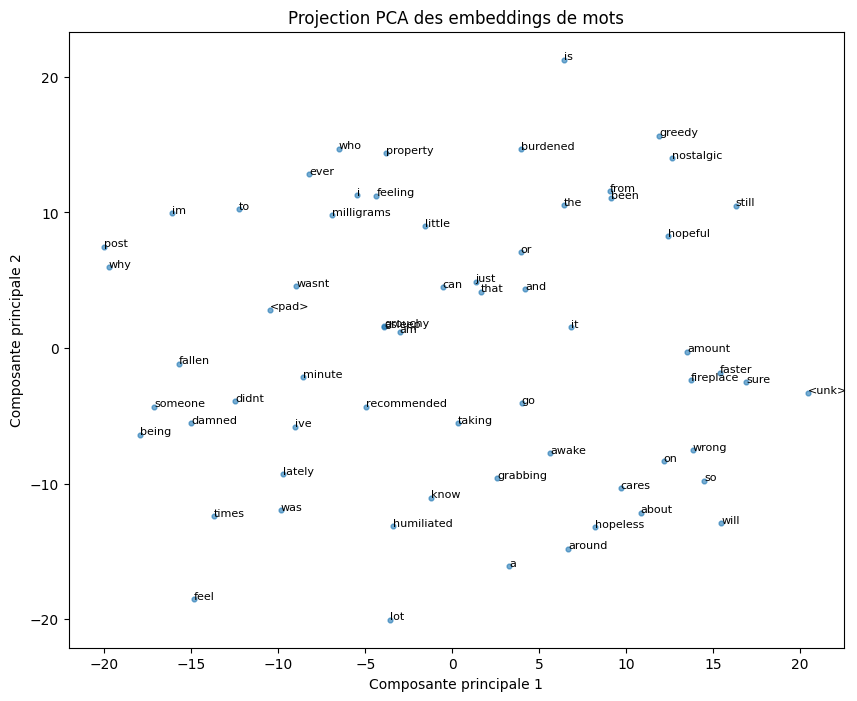

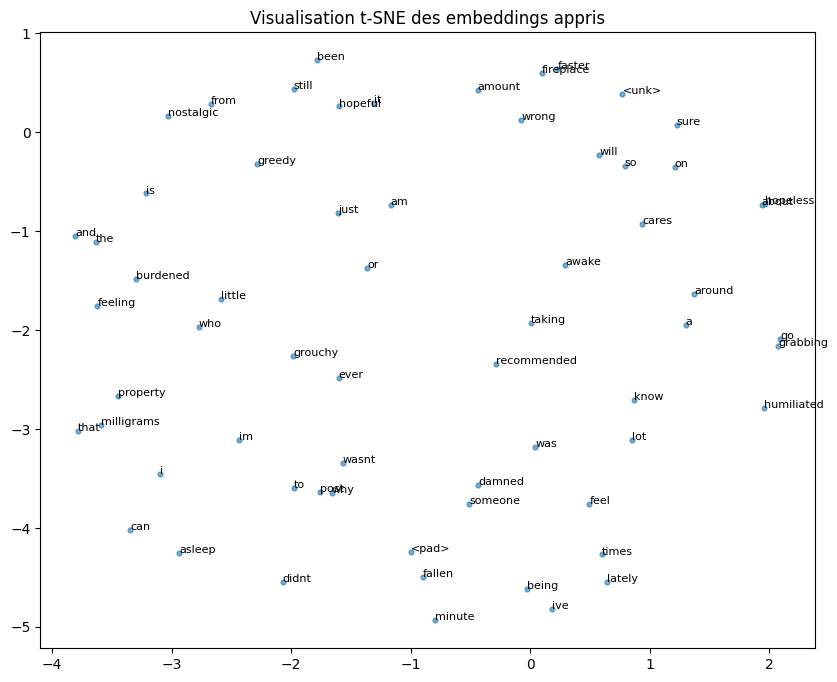

In [8]:

import torch
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# --- Extraire la matrice d'embeddings ---
embeddings = trainer.rnn.i2e.weight.detach().cpu().numpy()  # [vocab_size, emb_size]
words = list(trainer.vocab.mapping.keys())

# --- Réduction PCA ---
pca = PCA(n_components=2)
reduced = pca.fit_transform(embeddings)

max_words = min(len(words), len(reduced), 80)

plt.figure(figsize=(10, 8))
plt.scatter(reduced[:, 0], reduced[:, 1], alpha=0.6, s=12)
for i, word in enumerate(words[:max_words]):
    plt.text(reduced[i, 0], reduced[i, 1], word, fontsize=8)
plt.title("Projection PCA des embeddings de mots")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.show()

# --- Réduction t-SNE ---
try:
    tsne = TSNE(n_components=2, perplexity=30, max_iter=3000, random_state=42)  
except TypeError:
    tsne = TSNE(n_components=2, perplexity=30, n_iter=3000, random_state=42)   

reduced_tsne = tsne.fit_transform(embeddings)

max_words = min(len(words), len(reduced_tsne), 80)
plt.figure(figsize=(10, 8))
plt.scatter(reduced_tsne[:, 0], reduced_tsne[:, 1], alpha=0.6, s=12)
for i, word in enumerate(words[:max_words]):
    plt.text(reduced_tsne[i, 0], reduced_tsne[i, 1], word, fontsize=8)
plt.title("Visualisation t-SNE des embeddings appris")
plt.show()


La projection PCA montre une organisation encore diffuse des mots, avec quelques regroupements sémantiques émergents : les termes émotionnels comme hopeless, feel ou humiliated apparaissent proches, tandis que les mots fonctionnels (the, is, and) restent regroupés ailleurs, et les tokens spéciaux comme <pad> et <unk> sont clairement isolés. La visualisation t-SNE affine cette structure en révélant des micro-clusters plus cohérents : les mots exprimant des émotions négatives gravitent ensemble, alors que les mots neutres ou de liaison forment des zones distinctes. Cela indique que le RNN a partiellement capté des relations de sens et de contexte, mais de manière encore superficielle en raison du faible nombre d’epochs et de la taille réduite du corpus.

In [ ]:
# ==========================================================
#  Use the same vocab for context→word learning
# ==========================================================
from torch.utils.data import Dataset, DataLoader
from data_processing import tokenizer, one_hot
from rnn_model import SimpleRNN
import torch.nn as nn
import torch.optim as optim

class ContextDataset(Dataset):
    def __init__(self, texts, vocab, window=3, max_len=5):
        self.vocab = vocab
        self.max_len = max_len
        self.samples = []
        for s in texts:
            tokens = tokenizer(s)
            encoded = vocab(tokens)
            for i in range(1, len(encoded)):
                context = encoded[max(0, i - window):i]
                target = encoded[i]
                self.samples.append((context, target))

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        context, target = self.samples[idx]
        pad_id = self.vocab["<pad>"]
        if len(context) < self.max_len:
            context = [pad_id] * (self.max_len - len(context)) + context
        context_one_hot = one_hot(context, num_classes=len(self.vocab))
        X = torch.tensor(context_one_hot, dtype=torch.float32)
        y = torch.tensor(target, dtype=torch.long)
        return X, y


# --- Build context dataset using same vocab from trainer ---
auto_dataset = ContextDataset(trainer.train_dataset.texts, trainer.vocab)
auto_loader = DataLoader(auto_dataset, batch_size=32, shuffle=True)

# --- Initialize new model for auto-supervised learning ---
device = trainer.device
model_auto = SimpleRNN(len(trainer.vocab), 64, 64, len(trainer.vocab)).to(device)
criterion_auto = nn.NLLLoss()
optimizer_auto = optim.Adam(model_auto.parameters(), lr=0.002)

print("\n Auto-supervised training started...\n")
for epoch in range(5):
    model_auto.train()
    total_loss = 0
    for X, y in auto_loader:
        X, y = X.to(device), y.to(device)
        hidden = model_auto.init_hidden(X.size(0), device=device)
        for t in range(X.size(1)):
            output, hidden = model_auto(X[:, t, :], hidden)
        loss = criterion_auto(output, y)
        optimizer_auto.zero_grad()
        loss.backward()
        optimizer_auto.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1} | Loss: {total_loss / len(auto_loader):.4f}")

print("\nAuto-supervised context→word training done.\n")



 Auto-supervised training started...

